<a href="https://colab.research.google.com/github/quvyshnav/Data-Analysis/blob/main/walmart_sales_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from ast import increment_lineno
# Import necessary libraries and supress warnings.
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

sns.set(style='whitegrid')

# set plot aesthetics for clarity

plt.rcParams['figure.figsize'] = (10,6)

# Data Loading and inspection

In [5]:
df = pd.read_csv('Walmart.csv')

In [6]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Holiday_Flag,6435.0,6.993007e-02,0.255049,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Fuel_Price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01


In [13]:
# Check for missing values and data types
print('Data types: \n', df.dtypes)
print('\nMissing values per column:\n', df.isnull().sum())

# Convert the 'Date' column to datetime format if not already

if not np.issubdtype(df['Date'].dtype,np.datetime64):
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
  print('\nConverted Date column to datetime')


Data types: 
 Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

Missing values per column:
 Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

Converted Date column to datetime


In [14]:
# Check if conversion resulted in any NaT values
if df['Date'].isnull().sum()>0:
  print('\nWarning: NaT values found in Date column')

In [15]:
df['Date'].isna().sum()

np.int64(3870)

In [16]:
df.shape

(6435, 8)

In [17]:
df = df.dropna(subset=['Date'])
print('\nData shape after preprocessing : ', df.shape)


Data shape after preprocessing :  (2565, 8)


# Exploratory Data Analysis (EDA)

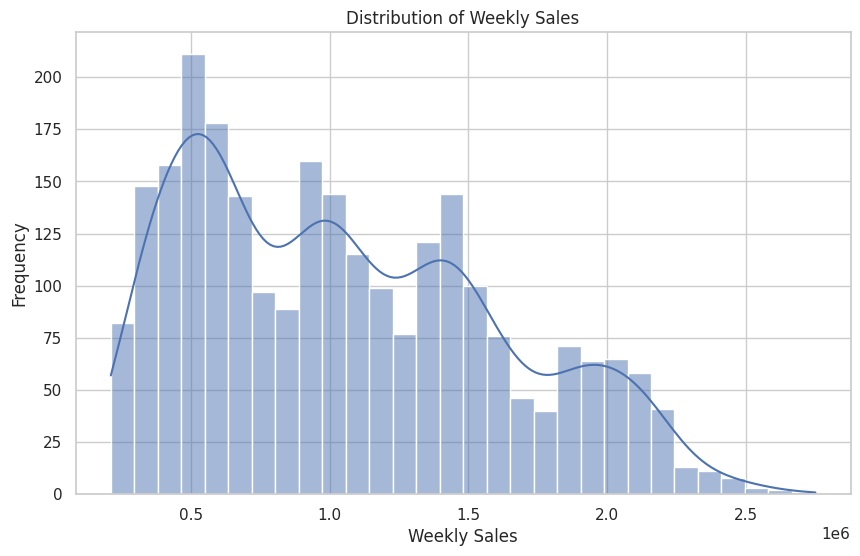

In [19]:
# Let's create several visualizations to get a better understanding of the data

## Histogram of weekly Sales

sns.histplot(df['Weekly_Sales'],bins=30, kde=True)
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

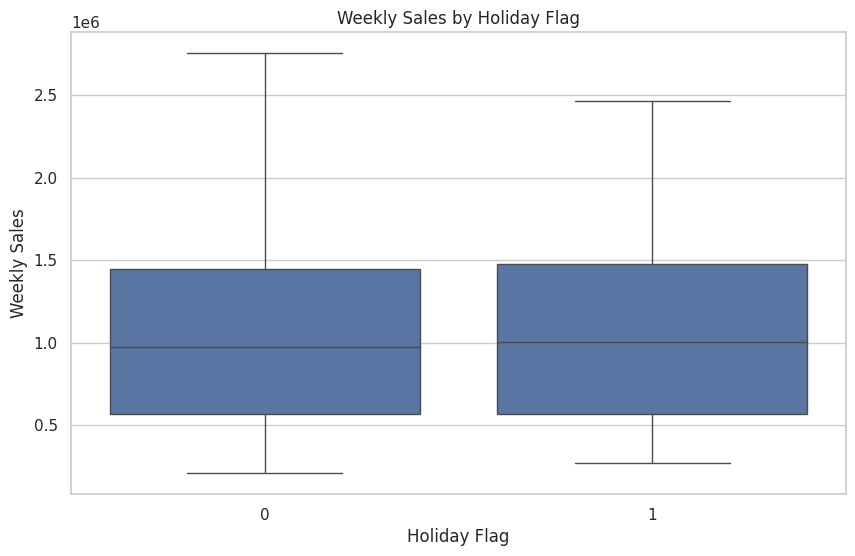

In [21]:
## Box Plot for weekly Sales  by Holiday Flag

sns.boxplot(x='Holiday_Flag',y='Weekly_Sales', data=df)
plt.title('Weekly Sales by Holiday Flag')
plt.xlabel('Holiday Flag')
plt.ylabel('Weekly Sales')
plt.show()

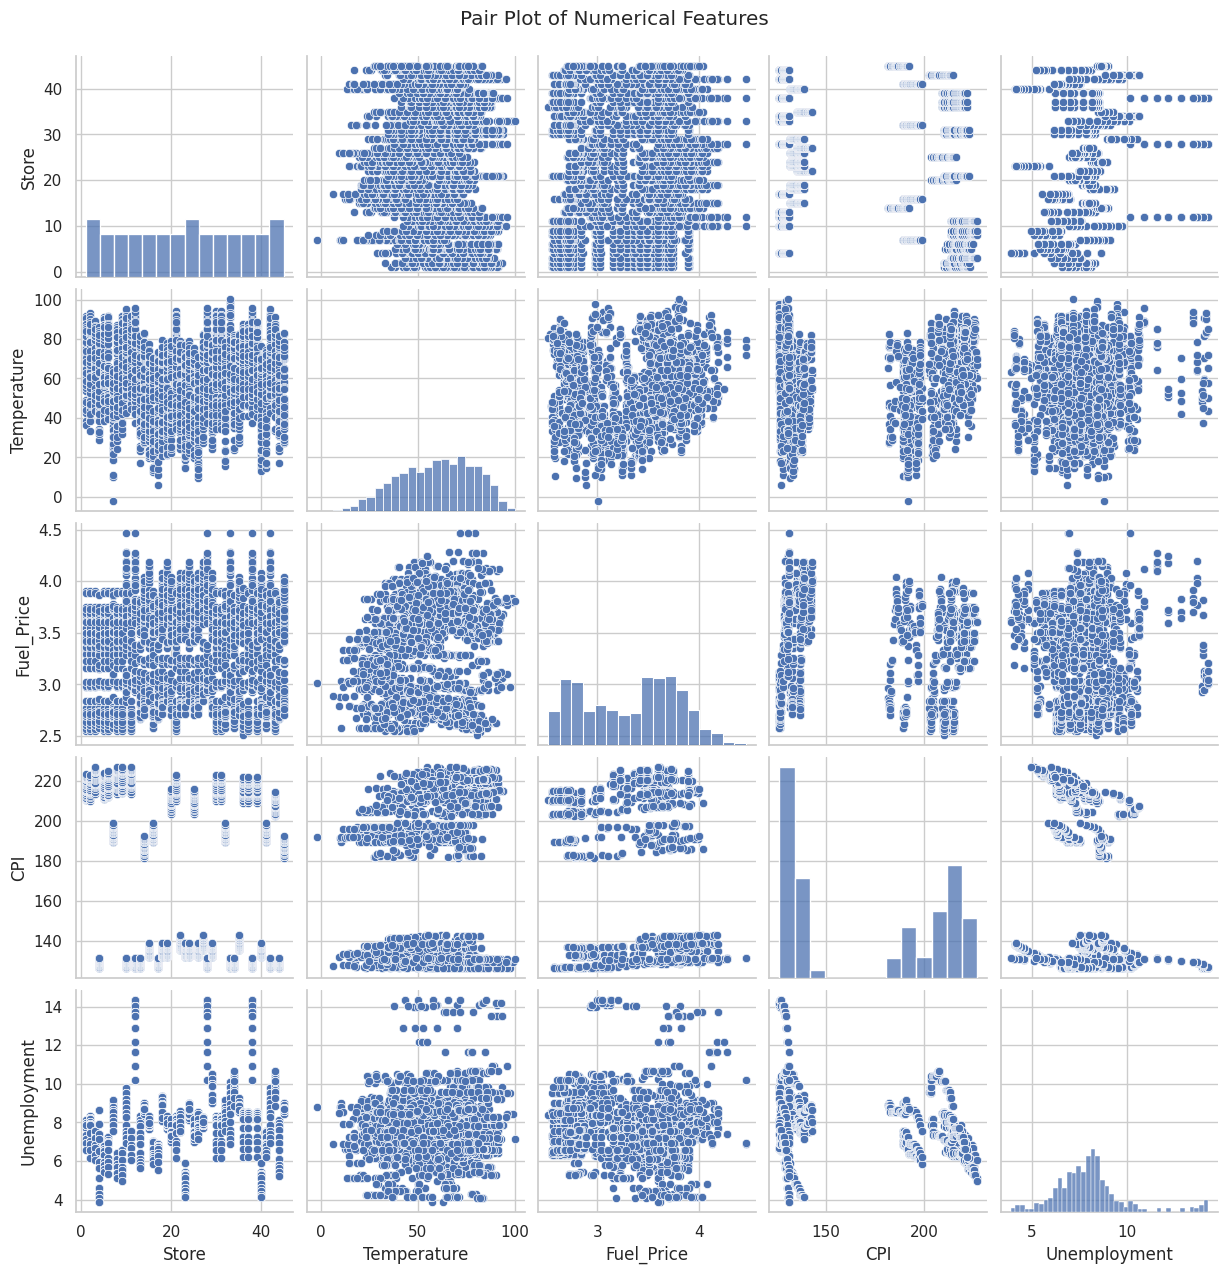

In [23]:
## Pair plot of Numerical Features

numerical_cols = ['Store','Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
sns.pairplot(df[numerical_cols])
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

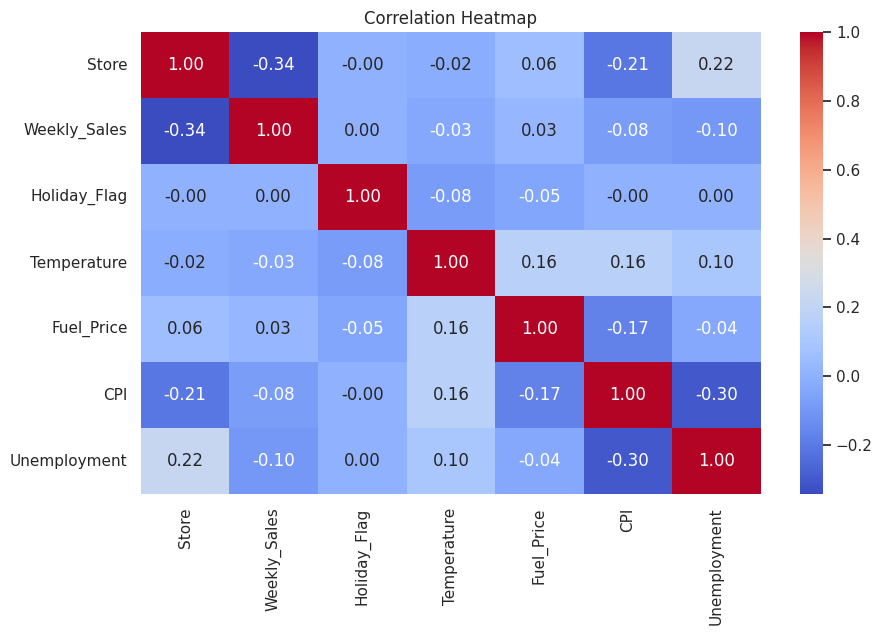

In [24]:
## Correlkation Heatmap

numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

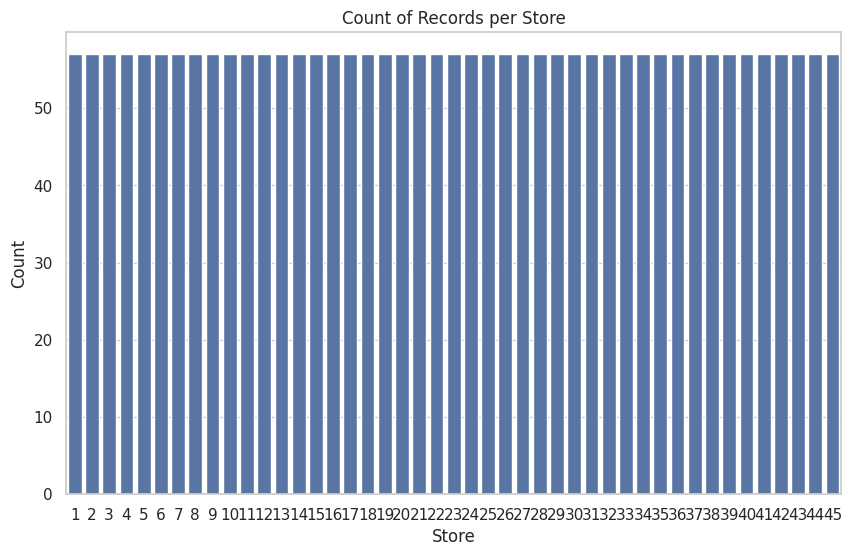

In [25]:
## Count Plot (Pie Chart alternative) for Store frequencies
sns.countplot(x='Store', data=df)
plt.title('Count of Records per Store')
plt.xlabel('Store')
plt.ylabel('Count')
plt.show()

# Predictive Modeling

In [29]:
# We now prepare our feature set and target variable for regression modeling
features = ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
target = 'Weekly_Sales'

# Before splitting, ensure that our data is not empty to avoid errors during train_test_split
if df.shape[0] == 0:
    raise ValueError('The input dataframe is empty. Please verify the data source.')

X = df[features]
y = df[target]

# Verify that X and y have data
print('Features shape:', X.shape)
print('Target shape:', y.shape)

# Clever note: If you ever encounter ValueError related to an empty train set (as seen in some executions),
# it might be because the selection or filtering in earlier steps led to an empty dataframe. Always check the shape!

Features shape: (2565, 6)
Target shape: (2565,)


In [30]:
# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'R² Score: {r2:.4f}')
print(f'RMSE: {rmse:.4f}')

R² Score: 0.1241
RMSE: 533931.0743


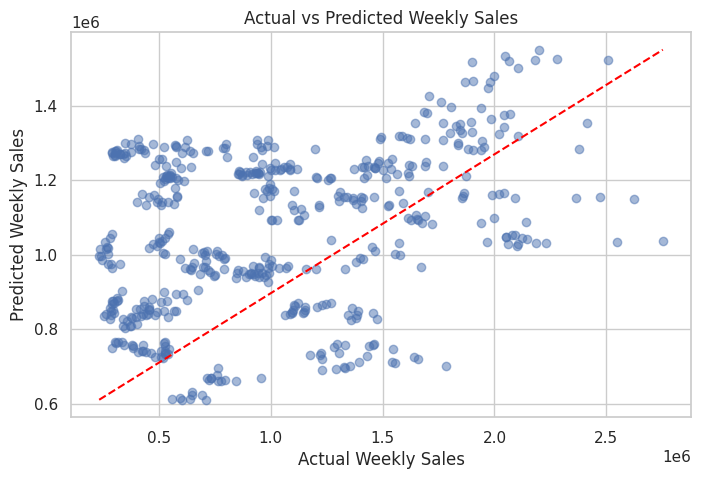

In [33]:
# Visualization: Actual vs Predicted Weekly Sales
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales')
plt.title('Actual vs Predicted Weekly Sales')
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], linestyle='--', color='red')
plt.show()

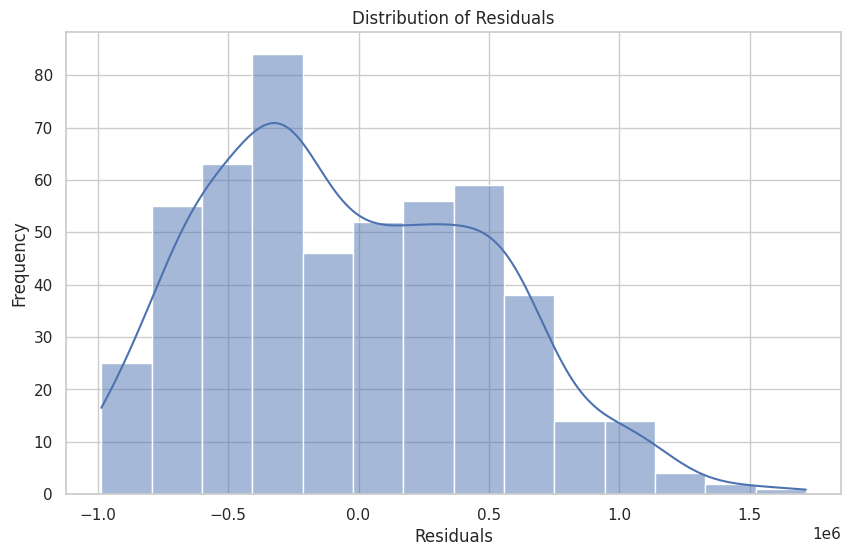

In [34]:
# Additionally, a residual plot might help us visualize the errors
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

Conclusion and Future Work

In this notebook, we explored the Walmart dataset by performing data cleaning,
visualizing different aspects of the data,
and building a linear regression model to predict weekly sales.
The model's performance is measured by R² and RMSE.

A few points to consider for future analysis:

Experiment with more sophisticated predictive models
(e.g., Random Forests or Gradient Boosting) to see if performance improves.

Explore time series analysis techniques since the dataset includes datetime information.

Investigate additional feature engineering possibilities,
such as extracting week or month from the Date column or incorporating
store-specific effects.

